In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.stats import poisson
from scipy.stats import norm

%matplotlib inline


In [2]:
from math import log10
def eng_str(x, u=0, n=1):
    """Print formatted value and its uncertainty in engineering format"""
    y = abs(x)
    exponent = int(log10(y))
    engr_exponent = exponent - exponent%3
    z = y/10**engr_exponent
    sign = '-' if x < 0 else ''
    fmt = "{z:.%df}" % (n)
    xStr = sign+fmt.format(z=z)
    
    # uncertainty
    yU = abs(u)
    zU = yU/10**engr_exponent
    fmtU = "{zU:.%df}" % (n)
    if engr_exponent != 0:
        uStr = " ± "+fmtU.format(zU=zU)+'e'+str(engr_exponent)
    else:
        uStr = " ± "+fmtU.format(zU=zU)
    return xStr + uStr

print(eng_str(123456, 3456, n=1))

123.5 ± 3.5e3


In [21]:
files = glob("Data/*.csv")
files.sort()
for (i, f) in enumerate(files):
    print(f"{i:3d}: {f}")
iFile = int(input("Enter file number: "))
dataFile = files[iFile]
print(f"Using {dataFile}")

# Check if data file from this test
with open(dataFile, 'r') as fp:
    line = fp.readline()

data = np.genfromtxt(dataFile, delimiter=',', comments='#')
D = data[:,0]
avgCounts = data[:,1]
uncCounts = data[:,2]
nPoints = len(D)
print(f"There are {nPoints} points")
figName = "Figures/" + dataFile[dataFile.find('C'):dataFile.rfind('.')] + r"_%.03d.png"
print(f"Figures are {figName}")
iPlot = 0

  0: Data/2022-06-07-2031-2_0mm.csv
  1: Data/2022-06-07-2038-10_0mm.csv
  2: Data/2022-06-07-2045-18_0mm.csv
  3: Data/2022-06-07-2049-5_2mm.csv
  4: Data/2022-06-07-2052-13_2mm.csv
  5: Data/2022-06-07-2057-8_4mm.csv
  6: Data/2022-06-07-2102-16_4mm.csv
  7: Data/2022-06-07-2108-11_6mm.csv
  8: Data/2022-06-07-2111-19_6mm.csv
  9: Data/2022-06-07-2114-7_4mm.csv
 10: Data/2022-06-07-2118-15_4mm.csv
 11: Data/2022-06-07-2123-10_6mm.csv
 12: Data/2022-06-07-2126-18_6mm.csv
 13: Data/CPS_vs_D.csv
Enter file number: 13
Using Data/CPS_vs_D.csv
There are 13 points
Figures are Figures/CPS_vs_D_%.03d.png


In [20]:
print(dataFile)
figName = "Figures/" + dataFile[dataFile.find('C'):dataFile.rfind('.')] + r"_%.03d.png"
print(figName)

Data/CPS_vs_D.csv
Figures/CPS_vs_D_%.03d.png


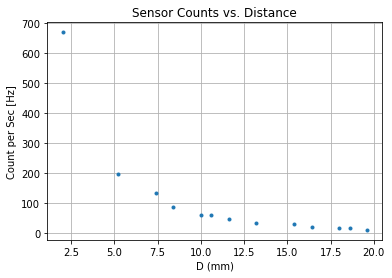

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(D, avgCounts, '.')
ax.grid()
ax.set_title(f"Sensor Counts vs. Distance")
ax.set_xlabel("D (mm)")
ax.set_ylabel("Count per Sec [Hz]")
# ax.text(.02,.95, f"Rate = {eng_str(avgCPS, uncCPS, n=1)} Hz", transform=ax.transAxes)

iPlot = 0
fn = figName%iPlot
#ax.text(1, 0.02,fn[8:], transform=fig.transFigure, ha='right', fontsize=5)
fig.savefig(fn, dpi=150)
iPlot += 1

pass